# Iris dataset disection (Figure 1.3, 1.4)
Based on Figure 1.3 and 1.4 we plot pairwise datamapping and visiualize it using matrix plot.

We also draw decision tree using only 2 features petal length and petal width across mutliple depths in a tree format. We test it using depth 2/3/Unrestricted. Unrestricted mode is a mode where we don't spectify the depth of the tree and let decision tree package identify the correct depth of the Tree.

We also plot a surface diagram which shows the division across the 3 types.

However we observe that there is only 1 datapoint in unrestricted which is unconclusive based on the data

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Font sizes
SIZE_SMALL = 18  # 14
SIZE_MEDIUM = 20  # 18
SIZE_LARGE = 24

# https://stackoverflow.com/a/39566040
plt.rc("font", size=SIZE_SMALL)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_SMALL)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_SMALL)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_SMALL)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_SMALL)  # fontsize of the tick labels
plt.rc("legend", fontsize=SIZE_SMALL)  # legend fontsize
plt.rc("figure", titlesize=SIZE_LARGE)  # fontsize of the figure title

import os
try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
import seaborn as sns;
sns.set(style="ticks", color_codes=True)

try:
    import pandas as pd
except ModuleNotFoundError:
    %pip install -qq pandas
    import pandas as pd
pd.set_option('display.precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

try:
    import sklearn
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    import sklearn

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
Y = iris.target
# Here [2,3] is to include onlt 2 features petal length and petal width
xnames = [iris.feature_names[i] for i in [2,3]]
ynames = iris.target_names

# print(X.shape)
# print(X[:,2:].shape)
# # print(iris.target)
# df = pd.DataFrame(data=X, columns=iris.feature_names)
# df['label'] = pd.Series(iris.target_names[Y], dtype='category')

# # we pick a color map to match that used by decision tree graphviz
# palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

# g = sns.pairplot(df, vars = df.columns[0:4], hue="label", palette=palette)
# pml.savefig('iris_scatterplot_purple.pdf')
# plt.show()


**Max Depth** 2

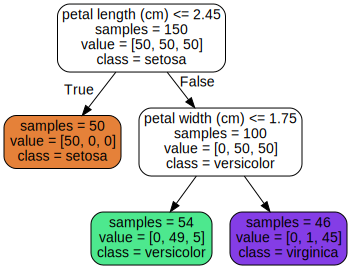

In [59]:
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

X_tree = X[:,2:].copy()
# Decision tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_tree, Y)

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=xnames,
    class_names=ynames,
    rounded=True,
    impurity=False,
    filled=True,
)

Source.from_file("iris_tree.dot")

<ipython-input-60-f60106021723>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


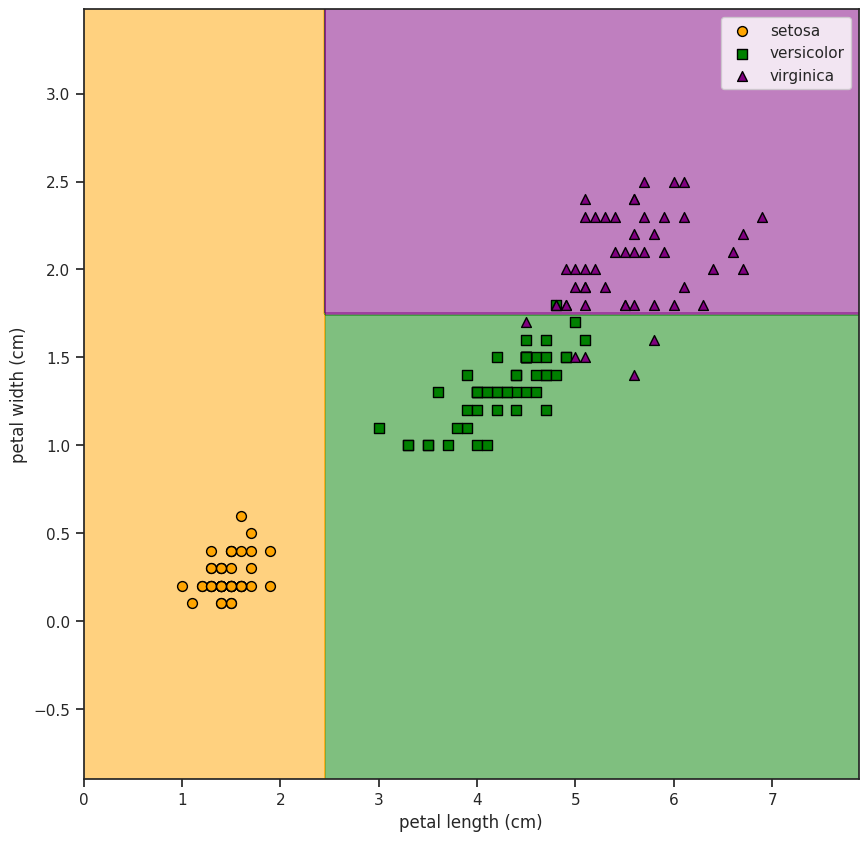

In [60]:
from matplotlib.colors import ListedColormap
# Surface plot util
def plot_surface(clf, X, y, xnames, ynames):
    n_classes = 3
    plot_step = 0.02
    markers = ["o", "s", "^"]

    plt.figure(figsize=(10, 10))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.xlabel(xnames[0])
    plt.ylabel(xnames[1])

    # we pick a color map to match that used by decision tree graphviz
    cmap = ListedColormap(["orange", "green", "purple"])
    # cmap = ListedColormap(['blue', 'orange', 'green'])
    # cmap = ListedColormap(sns.color_palette())
    plot_colors = [cmap(i) for i in range(4)]

    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    # Plot the training points
    for i, color, marker in zip(range(n_classes), plot_colors, markers):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], label=ynames[i], edgecolor="black", color=color, s=50, cmap=cmap, marker=marker
        )
    plt.legend()

# Using surface plot util
plot_surface(tree_clf, X_tree, Y, xnames, ynames)

**Max Depth** 3

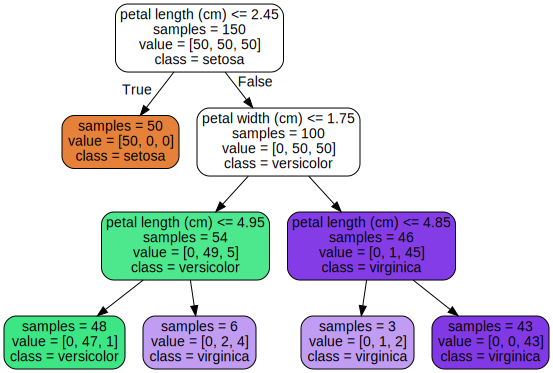

In [61]:
# Decision tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_tree, Y)

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=xnames,
    class_names=ynames,
    rounded=True,
    impurity=False,
    filled=True,
)

Source.from_file("iris_tree.dot")

<ipython-input-60-f60106021723>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


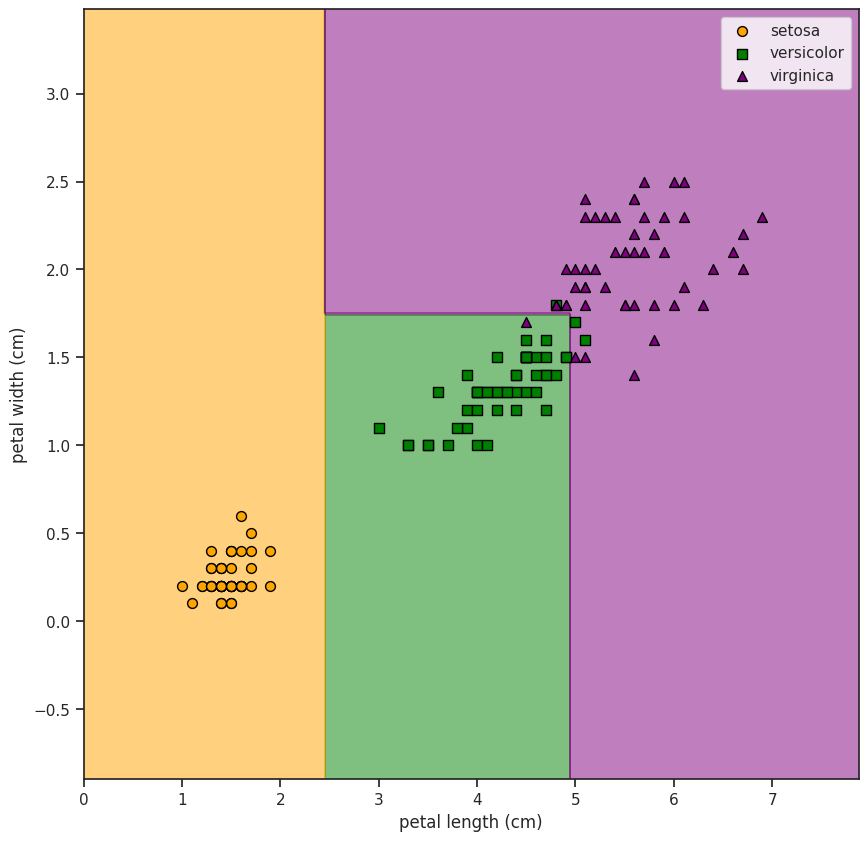

In [62]:
# Using surface plot util
plot_surface(tree_clf, X_tree, Y, xnames, ynames)

**Max Depth** Unrestricted

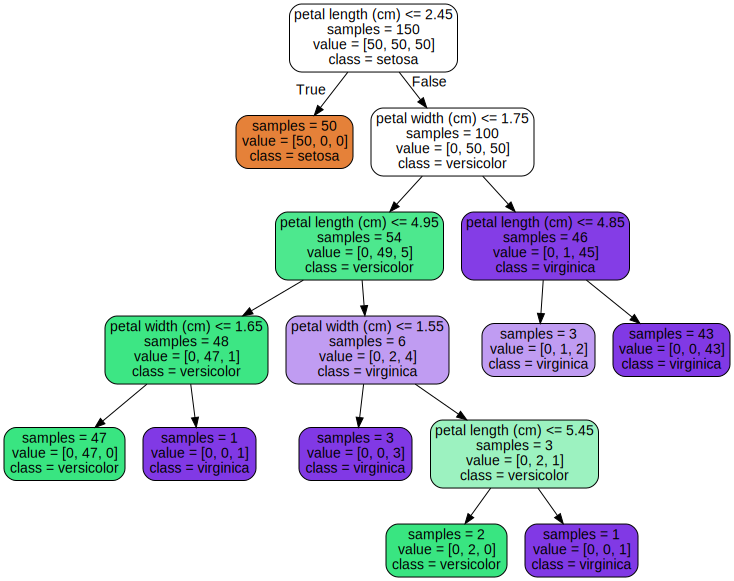

In [65]:
# Decision tree
tree_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_clf.fit(X_tree, Y)

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=xnames,
    class_names=ynames,
    rounded=True,
    impurity=False,
    filled=True,
)

Source.from_file("iris_tree.dot")

<ipython-input-60-f60106021723>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


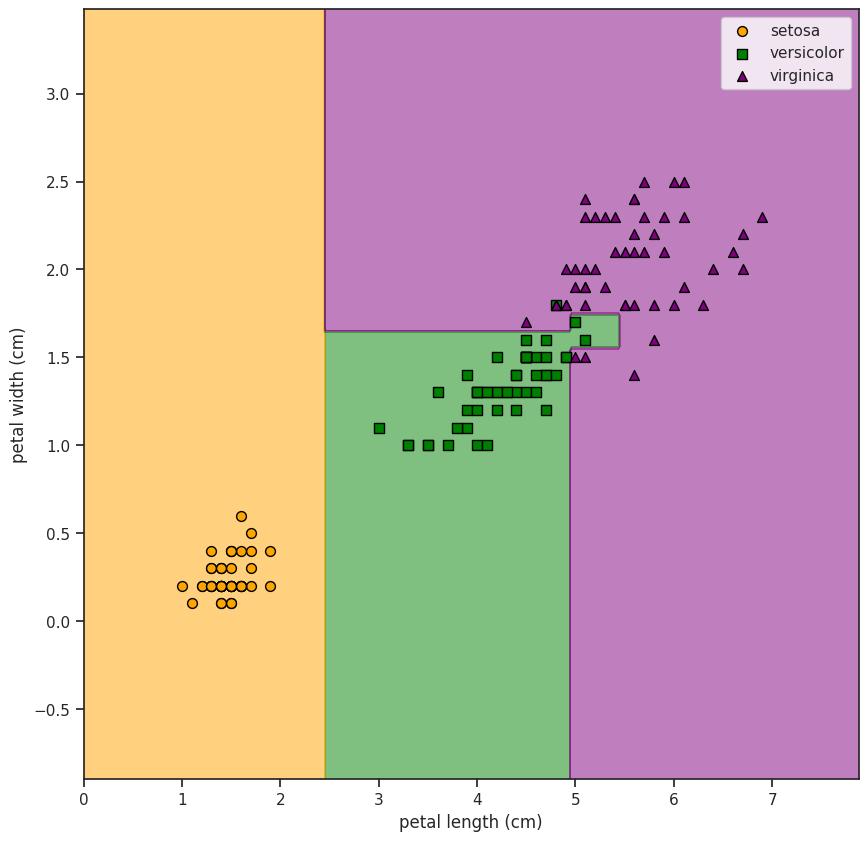

In [66]:
# Using surface plot util
plot_surface(tree_clf, X_tree, Y, xnames, ynames)